In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import langdetect

In [34]:
dataset = pd.read_csv(r"..\data\shoe_reviews.csv")
dataset.head(10)

,Brand,Type,Gender,Size,Number_Sold,Price(USD),review_title,review_text,review_rating
0,Nike,Basketball,Men,US 10,"2,242",170.0,Love em,Love these. Was looking for converses and thes...,5
1,Adidas,Running,Men,US 9.5,240,180.0,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2
2,Reebok,Casual,Men,US 11,"16,662",75.0,Good quality,Good quality,5
3,Converse,Casual,Women,US 8,135,55.0,Good,Great,5
4,Puma,Lifestyle,Women,US 7.5,240,80.0,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5
5,Vans,Skate,Men,US 8.5,455,65.0,delusione,Sono solita comprare scarpe Guess e non ho mai...,1
6,New Balance,Running,Women,US 6.5,"72,611",175.0,Molto belle,"Le scarpe sono molto belle, calzano perfettamente",5
7,Asics,Running,Men,US 10.5,84,160.0,Molto carine e comode,Semplicemente perfette. Io uso plantari su mis...,5
8,Fila,Fashion,Women,US 9,"1,795",65.0,Bellissime....peccato per il numero,"Le scarpe sono bellissime, arrivate in perfett...",5
9,Skechers,Running,Men,US 9,309,110.0,"Scarpe ben realizzate, venditore ottimo",Le scarpe sono ben fatte e il venditore molto ...,5


In [35]:
# Stimulate new columns
num_user = 870
dataset['Product_id'] = np.random.choice([f"pdct_{p}" for p in range(34792, 99038)], size=len(dataset), replace=True)
dataset['User_id'] = np.random.choice([f"user_{i}" for i in range(1, num_user+1)], size=len(dataset), replace=True)
dataset.head()

,Brand,Type,Gender,Size,Number_Sold,Price(USD),review_title,review_text,review_rating,Product_id,User_id
0,Nike,Basketball,Men,US 10,"2,242",170.0,Love em,Love these. Was looking for converses and thes...,5,pdct_70480,user_425
1,Adidas,Running,Men,US 9.5,240,180.0,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2,pdct_66989,user_384
2,Reebok,Casual,Men,US 11,"16,662",75.0,Good quality,Good quality,5,pdct_68165,user_729
3,Converse,Casual,Women,US 8,135,55.0,Good,Great,5,pdct_56702,user_239
4,Puma,Lifestyle,Women,US 7.5,240,80.0,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5,pdct_98285,user_179


In [36]:
# Reorder the columns
cols = list(dataset.columns)
cols.remove('Product_id')
cols.remove('User_id')
cols.insert(0, 'Product_id')
cols.insert(7, 'User_id')
dataset = dataset[cols]
dataset.head(10)

,Product_id,Brand,Type,Gender,Size,Number_Sold,Price(USD),User_id,review_title,review_text,review_rating
0,pdct_70480,Nike,Basketball,Men,US 10,"2,242",170.0,user_425,Love em,Love these. Was looking for converses and thes...,5
1,pdct_66989,Adidas,Running,Men,US 9.5,240,180.0,user_384,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2
2,pdct_68165,Reebok,Casual,Men,US 11,"16,662",75.0,user_729,Good quality,Good quality,5
3,pdct_56702,Converse,Casual,Women,US 8,135,55.0,user_239,Good,Great,5
4,pdct_98285,Puma,Lifestyle,Women,US 7.5,240,80.0,user_179,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5
5,pdct_68079,Vans,Skate,Men,US 8.5,455,65.0,user_248,delusione,Sono solita comprare scarpe Guess e non ho mai...,1
6,pdct_70524,New Balance,Running,Women,US 6.5,"72,611",175.0,user_399,Molto belle,"Le scarpe sono molto belle, calzano perfettamente",5
7,pdct_89640,Asics,Running,Men,US 10.5,84,160.0,user_600,Molto carine e comode,Semplicemente perfette. Io uso plantari su mis...,5
8,pdct_86078,Fila,Fashion,Women,US 9,"1,795",65.0,user_528,Bellissime....peccato per il numero,"Le scarpe sono bellissime, arrivate in perfett...",5
9,pdct_68554,Skechers,Running,Men,US 9,309,110.0,user_70,"Scarpe ben realizzate, venditore ottimo",Le scarpe sono ben fatte e il venditore molto ...,5


In [48]:
dataset.shape

(1001, 11)

In [51]:
def clean_review(text):
    try:
        if langdetect.detect(text) != 'en':
            return ""
    except:
        return ""

    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Keep only letters and spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

dataset['clean_review_title'] = dataset['review_title'].astype(str).apply(clean_review)
dataset['clean_review_text'] = dataset['review_text'].astype(str).apply(clean_review)

In [54]:
dataset.sample(20)

,Product_id,Brand,Type,Gender,Size,Number_Sold,Price(USD),User_id,review_title,review_text,review_rating,clean_review_title,clean_review_text
469,pdct_45202,Vans,Skate,Men,US 9,83,70.0,user_38,Great shoe,I loved the shoe but unfortunately didnâ€™t wo...,4,great shoe,i loved the shoe but unfortunately didnt work ...
227,pdct_74766,Vans,Skate,Women,US 6,998,70.0,user_684,weat 11 usually and for these shoes have 10. ...,weat 11 usually and for these shoes have 10.5 ...,5,weat usually and for these shoes have,weat usually and for these shoes have and next...
939,pdct_73134,Vans,Skate,Men,US 9.5,317,50.0,user_812,Talla equivocada! ðŸ˜–,Estaba especialmente feliz de recibir este mod...,3,,
654,pdct_84488,Nike,Running,Men,US 11,198,160.0,user_483,Consigliate,"corrisponde esattamente come da foto, sono mor...",5,,
550,pdct_54347,Vans,Skate,Women,US 7.5,"2,144",50.0,user_218,Great price for great product,Everything is okay ðŸ¤£,5,,everything is okay
22,pdct_76211,Reebok,Running,Men,US 11,706,120.0,user_134,NO SUPPORT! NOT FOR RUNNING!,I would NOT recommend these for running. They ...,1,,i would not recommend these for running they h...
256,pdct_65593,Converse,Casual,Men,US 12,173,85.0,user_551,So cute and good quality!,These sandals are adorable!! They fit just as ...,5,so cute and good quality,these sandals are adorable they fit just as ex...
660,pdct_49167,New Balance,Running,Men,US 10.5,240,150.0,user_468,Easy going,Just to say excellent thanks,5,,just to say excellent thanks
150,pdct_52189,Fila,Fashion,Men,US 11,843,75.0,user_539,Go ahead a purchase....they are worth it!,Beautiful and comfortable pair of shoes! I abs...,5,go ahead a purchasethey are worth it,beautiful and comfortable pair of shoes i abso...
697,pdct_55314,Converse,Basketball,Women,US 8.5,658,85.0,user_51,Perfectos y comodos,Son los primeros pies de gato que tengo. Los h...,5,,


In [62]:
dataset['combined_review'] = dataset['clean_review_title'] + " " + dataset['clean_review_text']
dataset = dataset[dataset['combined_review'].str.strip() != '']

In [63]:
dataset.head()

,Product_id,Brand,Type,Gender,Size,Number_Sold,Price(USD),User_id,review_title,review_text,review_rating,clean_review_title,clean_review_text,combined_review
0,pdct_70480,Nike,Basketball,Men,US 10,"2,242",170.0,user_425,Love em,Love these. Was looking for converses and thes...,5,,love these was looking for converses and these...,love these was looking for converses and thes...
1,pdct_66989,Adidas,Running,Men,US 9.5,240,180.0,user_384,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2,the plastic ripped,the shoes are very cute but after the nd day o...,the plastic ripped the shoes are very cute but...
2,pdct_68165,Reebok,Casual,Men,US 11,"16,662",75.0,user_729,Good quality,Good quality,5,good quality,good quality,good quality good quality
3,pdct_56702,Converse,Casual,Women,US 8,135,55.0,user_239,Good,Great,5,,great,great
14,pdct_68397,Puma,Lifestyle,Men,US 9.5,245,110.0,user_593,Perfect right outta the box,True to size. If between I'd probably go with ...,5,perfect right outta the box,true to size if between id probably go with yo...,perfect right outta the box true to size if be...


In [65]:
dataset.to_csv(r"../data/cleaned_shoe_dataset.csv", index=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_22624\447838068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_rating', data=dataset, palette='viridis')


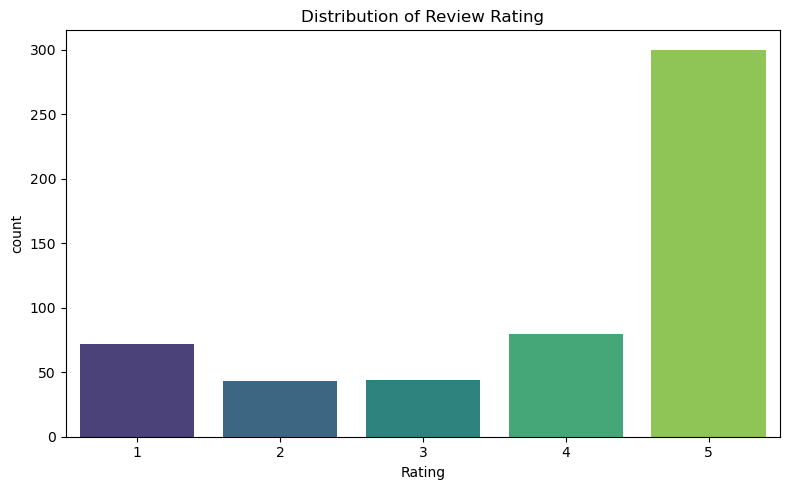

In [66]:
plt.figure(figsize=(8,5))
sns.countplot(x='review_rating', data=dataset, palette='viridis')
plt.title("Distribution of Review Rating")
plt.xlabel("Rating")
plt.ylabel("count")
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_22624\143827905.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette="rocket")


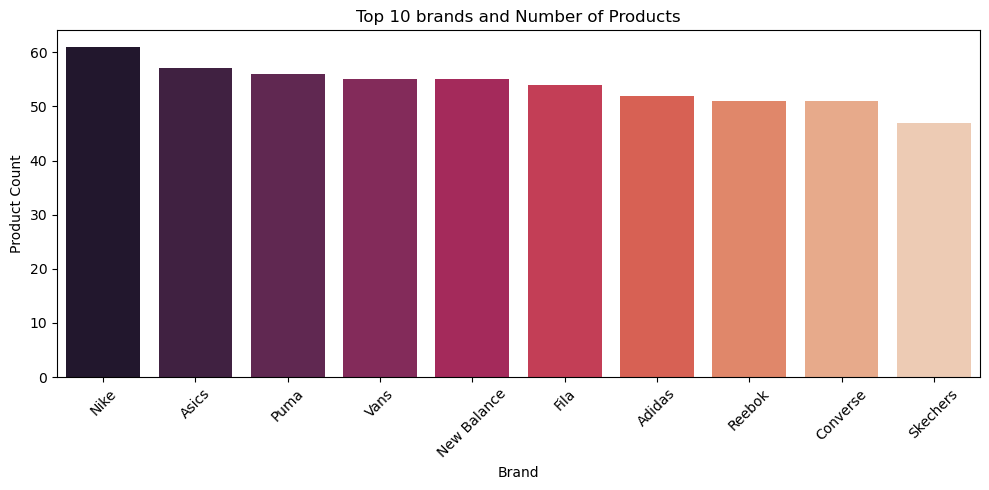

In [67]:
top_brands = dataset['Brand'].value_counts().nlargest(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_brands.index, y=top_brands.values, palette="rocket")
plt.title("Top 10 brands and Number of Products")
plt.xlabel("Brand")
plt.ylabel("Product Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_22624\813656287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Type", data=dataset, order=dataset['Type'].value_counts().index, palette="coolwarm")


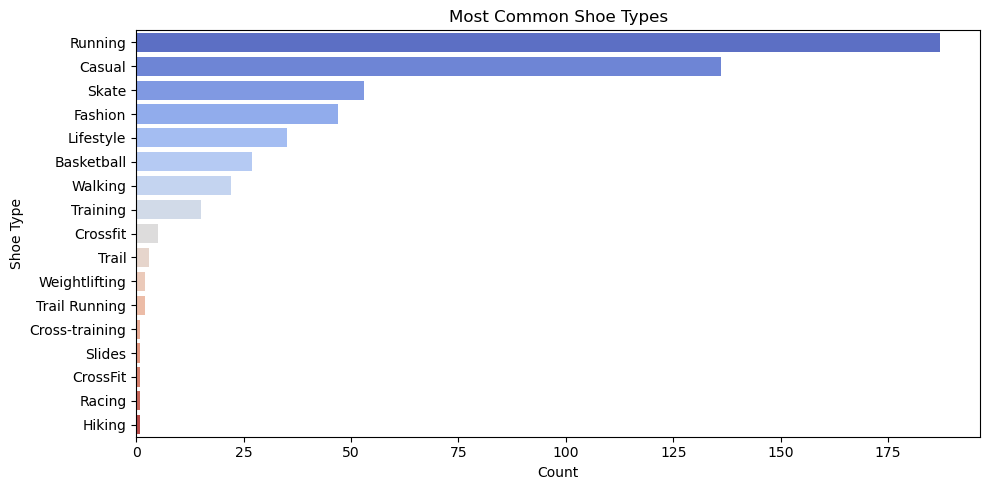

In [68]:
plt.figure(figsize=(10,5))
sns.countplot(y="Type", data=dataset, order=dataset['Type'].value_counts().index, palette="coolwarm")
plt.title("Most Common Shoe Types")
plt.xlabel("Count")
plt.ylabel("Shoe Type")
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_22624\2598185774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_rating', y='Price(USD)', data=dataset, palette="mako")


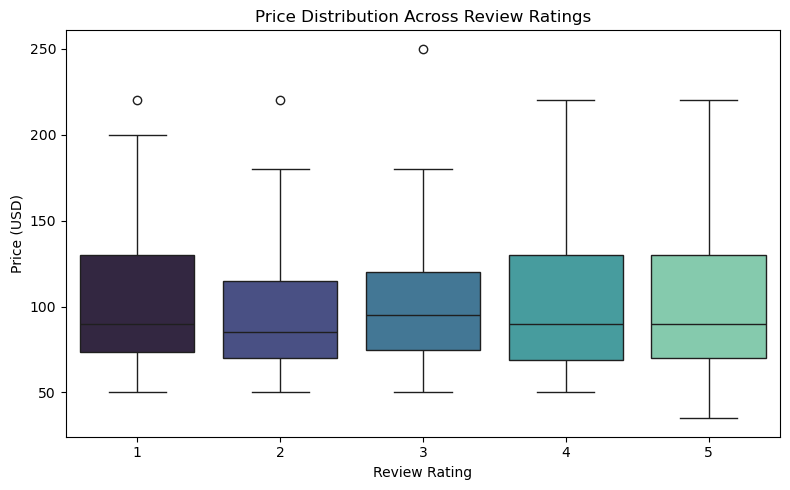

In [69]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='review_rating', y='Price(USD)', data=dataset, palette="mako")
plt.title("Price Distribution Across Review Ratings")
plt.xlabel("Review Rating")
plt.ylabel("Price (USD)")
plt.tight_layout()
plt.show()